In [1]:
#### Scrape wait times for Seattle DMV
#### Save wait times to a .csv file
### Callin Switzer
### 12 Sept 2017
## Python 3

In [34]:
from bs4 import BeautifulSoup

import requests

from datetime import datetime

import os.path
import os

import re

import time

In [35]:

url_dtw = "https://fortress.wa.gov/dol/dolprod/dsdoffices/OfficeInfo.aspx?cid=583&oid=24"
url_shl = 'https://fortress.wa.gov/dol/dolprod/dsdoffices/OfficeInfo.aspx?cid=594&oid=22'

def getWaitTimes():
    for ii in [url_dtw, url_shl]:
        page = requests.get(ii)

        if page.status_code == 200: 
            print("page status OK")

        # get soup
        soup = BeautifulSoup(page.content, 'html.parser')

        # find tag with waittime
        div = soup.find(id="ctl00_Main_waittime")
        
        
        
        try:
            ttime = list(div)[1]
            tme = list(ttime)[0].replace(" ", "").replace(".","")
            
            print(tme)
            
            todaysDate = datetime.today()
            datetime_object = datetime.strptime(str(todaysDate)[0:10] + " " +  tme, '%Y-%m-%d %I:%M%p')

            
            waitTime1 = list(div)[6]   

            waitTime = re.sub(",", "_", waitTime1)
            my_list = waitTime1.split(",")

            # get only numbers
            hourMins = [re.sub("[^0-9]", "", ff) for ff in my_list]

            if len(hourMins) > 1:
                mins = 60 * int(hourMins[0]) + int(hourMins[1])
            else: 
                mins = int(hourMins[0])

            print(mins)
            
        except: 
            print("No wait time listed")
            datetime_object = datetime.strftime(datetime.today(), '%Y-%m-%d %H:%M:%S')
            waitTime = "NA"
            mins = "NA"
            

        fname = '/Users/cswitzer/Desktop/waitTime.csv'
        


        if not os.path.isfile(fname):
            with open(fname,'w') as file:
                file.write("datetime_downtown" + "," + "waittime_downtown" + "," +  "mins_dtw" + "," 
                           + "dateTime_shoreline" + "," + "waitTime_shoreline" + "," + "mins_shl")
                file.write('\n')


        # write to .csv file
        with open(fname,'a') as file:
            file.write(str(datetime_object) + "," + str(waitTime) + "," + str(mins) + ",")
            print (str(datetime_object) + "," + str(waitTime))
            if ii == url_shl:
                file.write('\n')


In [ ]:
for kk in range (10): 
    print(kk) 
    getWaitTimes()
    time.sleep(900)
    
os.system('say "Times up times up hurray keep it shred and of crunk"')

0
page status OK
1:46pm
19
2017-09-27 13:46:00,19 minutes
page status OK
1:46pm
18
2017-09-27 13:46:00,18 minutes
1
page status OK
2:01pm
20
2017-09-27 14:01:00,20 minutes
page status OK
2:01pm
33
2017-09-27 14:01:00,33 minutes
2
page status OK
2:16pm
22
2017-09-27 14:16:00,22 minutes
page status OK
2:16pm
12
2017-09-27 14:16:00,12 minutes
3
page status OK
2:31pm
27
2017-09-27 14:31:00,27 minutes
page status OK
2:31pm
23
2017-09-27 14:31:00,23 minutes
4
page status OK
2:46pm
37
2017-09-27 14:46:00,37 minutes
page status OK
2:46pm
27
2017-09-27 14:46:00,27 minutes
5
page status OK
3:01pm
27
2017-09-27 15:01:00,27 minutes
page status OK
3:01pm
26
2017-09-27 15:01:00,26 minutes
6
page status OK
3:16pm
20
2017-09-27 15:16:00,20 minutes
page status OK
3:16pm
24
2017-09-27 15:16:00,24 minutes
7
page status OK
3:31pm
22
2017-09-27 15:31:00,22 minutes
page status OK
3:31pm
22
2017-09-27 15:31:00,22 minutes
8
page status OK
3:46pm
12
2017-09-27 15:46:00,12 minutes
page status OK
3:46pm
10
2017-

In [ ]:
# getWaitTimes()

In [1]:
# read in file and plot wait times

import pandas as pd

In [2]:
wt = pd.read_csv('/Users/cswitzer/Desktop/waitTime.csv')

In [3]:
wt.head()

,dateTime_dtn,waitTime_dtn,mins_dtn,datetime_shl,waittime_shl,mins_shl
0,9/12/17 10:42,48 minutes,48,9/12/17 10:42,1 hour_ 24 minutes,84.0
1,9/12/17 10:43,48 minutes,48,9/12/17 10:43,1 hour_ 24 minutes,84.0
2,9/12/17 10:46,50 minutes,50,9/12/17 10:46,1 hour_ 25 minutes,85.0
3,9/12/17 10:47,51 minutes,51,9/12/17 10:47,1 hour_ 22 minutes,82.0
4,9/12/17 10:48,52 minutes,52,9/12/17 10:48,1 hour_ 24 minutes,84.0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime


In [5]:
wt["tms_dtn"] = [datetime.strptime(xx, "%m/%d/%y %H:%M") for xx in wt.dateTime_dtn]
wt["tms_shl"] = [datetime.strptime(xx, "%m/%d/%y %H:%M") for xx in wt.datetime_shl]

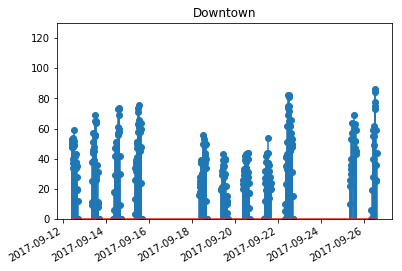

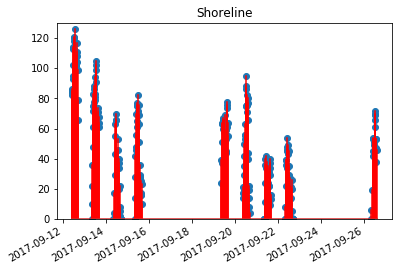

In [8]:
plt.stem(wt.tms_dtn, wt.mins_dtn)
plt.gcf().autofmt_xdate()
plt.ylim([0, 130])
plt.title("Downtown")
plt.show()

plt.stem(wt.tms_shl, wt.mins_shl, "r")
plt.gcf().autofmt_xdate()
plt.ylim([0, 130])
plt.title("Shoreline")
plt.show()

In [9]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [10]:
wt["day_dtn"] = [datetime.date(datetime.strptime(xx[0:7], "%m/%d/%y")) for xx in wt.dateTime_dtn]
wt["day_shl"] = [datetime.date(datetime.strptime(xx[0:7], "%m/%d/%y")) for xx in wt.datetime_shl]

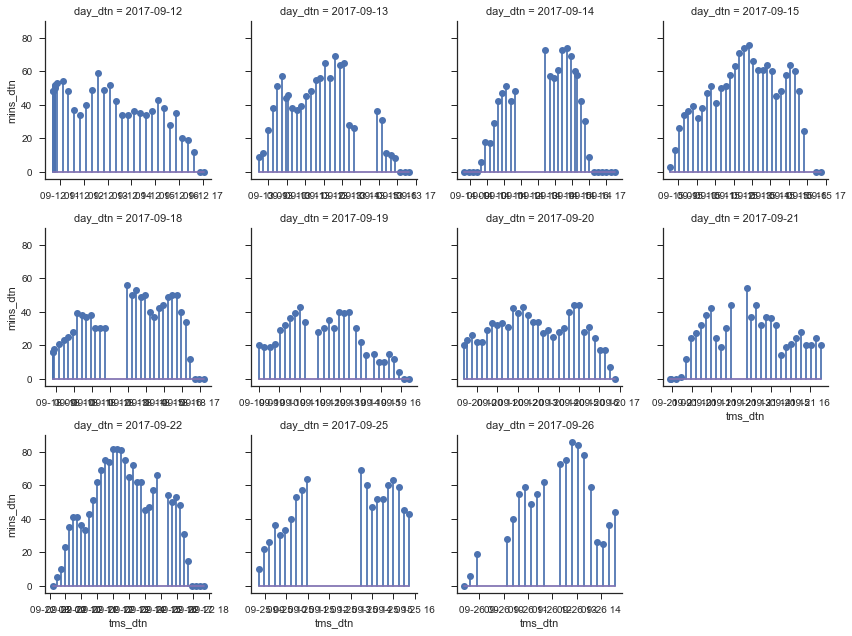

In [31]:
g = sns.FacetGrid(wt, col="day_dtn", sharex=False, col_wrap = 4)
g = g.map(plt.stem, "tms_dtn", "mins_dtn")

In [32]:
#fill na
wt = wt.fillna(0)

# drop NA's
#wt = wt.dropna()

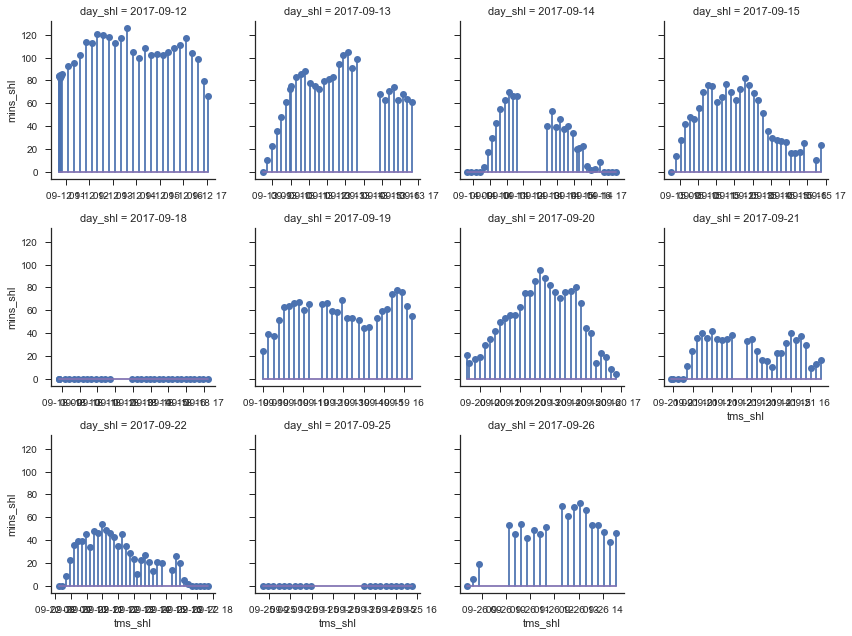

In [33]:
gg = sns.FacetGrid(wt, col="day_shl", sharex=False, col_wrap = 4)
gg = gg.map(plt.stem, "tms_shl", "mins_shl")